# Project Description

Netflix-inspired experiments with multiple design factors aim to minimize user browsing time by examining four primary factors: Tile Size, Match Score, Preview Length, and Preview Type. 

In [1]:
import pandas as pd
import numpy as np

from scipy import stats
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt

# A two-level factor screening experiment to identify key factors and refine target ranges

# Load and Examine Data

In [6]:
df_2k = pd.read_csv('../2ktest.csv')
df_2k.shape

(1100, 5)

In [48]:
df = pd.read_csv('../test1.csv')

In [9]:
df2k = pd.concat([df, df_2k], axis=0, ignore_index=True)
df2k.shape

(1600, 5)

Data Preprocessing

In [10]:
df2k.rename(lambda x: x.replace('.', '_'), axis='columns', inplace=True)
df2k.head()

,Prev_Length,Match_Score,Tile_Size,Prev_Type,Browse_Time
0,75,95,0.2,TT,14.822873
1,75,95,0.5,TT,13.416156
2,75,50,0.2,TT,15.881251
3,40,95,0.2,TT,10.952238
4,75,95,0.2,AC,20.825888


# 2^k test

In [11]:
model = smf.ols('Browse_Time ~ C(Prev_Length) * C(Match_Score) * C(Tile_Size)* C(Prev_Type)', data = df2k).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Browse_Time   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     767.0
Date:                Sat, 17 Feb 2024   Prob (F-statistic):               0.00
Time:                        15:45:50   Log-Likelihood:                -2271.5
No. Observations:                1600   AIC:                             4575.
Df Residuals:                    1584   BIC:                             4661.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================================
                                                                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                           22.0915      0.101    219.646      0.000      21.894      22.289
C(Prev_Length)[T.75]                                                                -1.2083      0.142     -8.495      0.000      -1.487      -0.929
C(Match_Score)[T.95]                                                                -3.0810      0.142    -21.661      0.000      -3.360      -2.802
C(Tile_Size)[T.0.5]                                                                 -0.1196      0.142     -0.841      0.400      -0.399       0.159
C(Prev_Type)[T.TT]                                                                  -4.9458      0.142    -34.771      0.000      -5.225      -4.667
C(Prev_Length)[T.75]:C(Match_Score)[T.95]                                            1.9983      0.201      9.934      0.000       1.604       2.393
C(Prev_Length)[T.75]:C(Tile_Size)[T.0.5]                                             0.2628      0.201      1.307      0.192      -0.132       0.657
C(Match_Score)[T.95]:C(Tile_Size)[T.0.5]                                             0.0955      0.201      0.475      0.635      -0.299       0.490
C(Prev_Length)[T.75]:C(Prev_Type)[T.TT]                                              0.0343      0.201      0.171      0.865      -0.360       0.429
C(Match_Score)[T.95]:C(Prev_Type)[T.TT]                                              0.0265      0.201      0.132      0.895      -0.368       0.421
C(Tile_Size)[T.0.5]:C(Prev_Type)[T.TT]                                               0.2066      0.201      1.027      0.305      -0.188       0.601
C(Prev_Length)[T.75]:C(Match_Score)[T.95]:C(Tile_Size)[T.0.5]                       -0.1889      0.284     -0.664      0.507      -0.747       0.369
C(Prev_Length)[T.75]:C(Match_Score)[T.95]:C(Prev_Type)[T.TT]                        -0.0355      0.284     -0.125      0.901      -0.594       0.522
C(Prev_Length)[T.75]:C(Tile_Size)[T.0.5]:C(Prev_Type)[T.TT]                         -0.2107      0.284     -0.741      0.459      -0.769       0.347
C(Match_Score)[T.95]:C(Tile_Size)[T.0.5]:C(Prev_Type)[T.TT]                         -0.0754      0.284     -0.265      0.791      -0.633       0.483
C(Prev_Length)[T.75]:C(Match_Score)[T.95]:C(Tile_Size)[T.0.5]:C(Prev_Type)[T.TT]     0.1062      0.402      0.264      0.792      -0.683       0.895
==============================================================================
Omnibus:                        2.380   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.304   Jarque-Bera (JB):                2.367
Skew:          

# Main effect plots

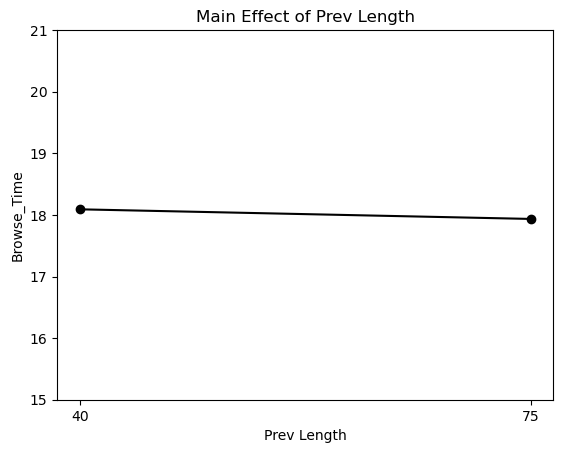

In [12]:
# Main effect: Prev_Length
pl75 = df2k.groupby(['Prev_Length']).get_group(75)['Browse_Time'].mean()
pl40 = df2k.groupby(['Prev_Length']).get_group(40)['Browse_Time'].mean()
plt.figure()
plt.scatter(x = [1,2], y = [pl40,pl75], c = "black")
plt.ylim(15,21)
plt.ylabel("Browse_Time")
plt.xlabel("Prev Length")
plt.title("Main Effect of Prev Length")
plt.xticks(ticks = [1,2], labels = [ "40",'75'])
plt.plot([1,2], [pl40, pl75], c = "black")
plt.show()

In [13]:
pl40, pl75

(18.09099308533613, 17.934920805821175)

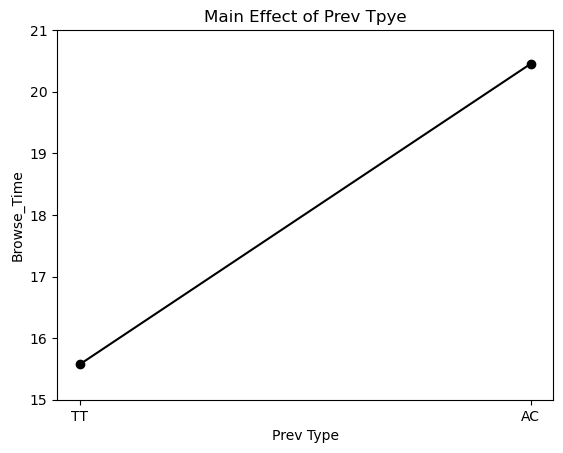

In [14]:
# Main effect: Prev_Type
pttt = df2k.groupby(['Prev_Type']).get_group('TT')['Browse_Time'].mean()
ptac = df2k.groupby(['Prev_Type']).get_group('AC')['Browse_Time'].mean()
plt.figure()
plt.scatter(x = [1,2], y = [pttt, ptac], c = "black")
plt.ylim(15,21)
plt.ylabel("Browse_Time")
plt.xlabel("Prev Type")
plt.title("Main Effect of Prev Tpye")
plt.xticks(ticks = [1,2], labels = ['TT', "AC"])
plt.plot([1,2], [pttt, ptac], c = "black")
plt.show()

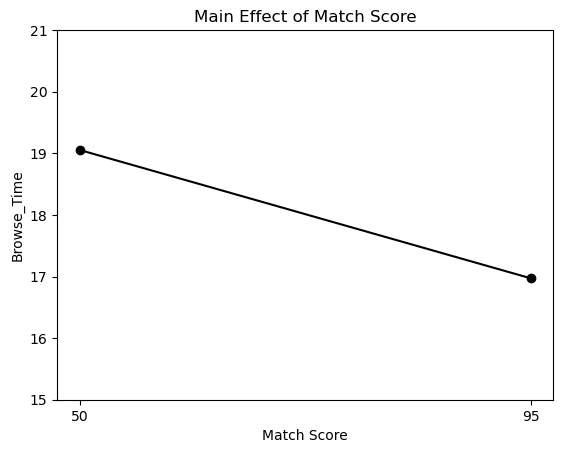

In [15]:
# Main effect: Match_Score
ms95 = df2k.groupby(['Match_Score']).get_group(95)['Browse_Time'].mean()
ms50 = df2k.groupby(['Match_Score']).get_group(50)['Browse_Time'].mean()
plt.figure()
plt.scatter(x = [1,2], y = [ms50, ms95], c = "black")
plt.ylim(15,21)
plt.ylabel("Browse_Time")
plt.xlabel("Match Score")
plt.title("Main Effect of Match Score")
plt.xticks(ticks = [1,2], labels = ['50', "95"])
plt.plot([1,2], [ms50, ms95], c = "black")
plt.show()

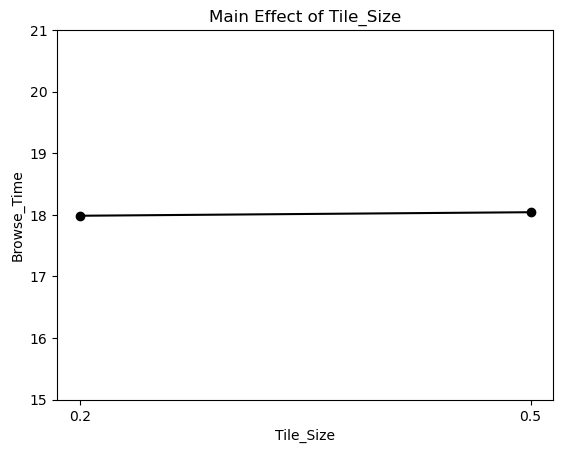

In [16]:
# Main effect: Tile_Size
ts2 = df2k.groupby(['Tile_Size']).get_group(0.2)['Browse_Time'].mean()
ts5 = df2k.groupby(['Tile_Size']).get_group(0.5)['Browse_Time'].mean()
plt.figure()
plt.scatter(x = [1,2], y = [ts2, ts5], c = "black")
plt.ylim(15,21)
plt.ylabel("Browse_Time")
plt.xlabel("Tile_Size")
plt.title("Main Effect of Tile_Size")
plt.xticks(ticks = [1,2], labels = ['0.2', "0.5"])
plt.plot([1,2], [ts2, ts5], c = "black")
plt.show()

# Conclusion from the two-level factor test
Prev. Length, Prev. Type and Match Score have significant main effects, while Tile Size is not a significant factor. Prev. Length and Match Score is the only significant interaction.

# Pairwise comparison tests are conducted through the following process:

1. Variance equality is determined through an F-test. If the test indicates equal variances, a t-test is employed.
2. A Student's t-test is then conducted for the null hypothesis.

# Prev.type
F-test

In [17]:
# Prev.type
pttt = df.groupby(['Prev.Length','Match.Score','Tile.Size','Prev.Type']).\
get_group((75,95,0.2,'TT'))['Browse.Time']
ptac = df.groupby(['Prev.Length','Match.Score','Tile.Size','Prev.Type']).\
get_group((75,95,0.2,'AC'))['Browse.Time']
pttt.mean(),ptac.mean()

(14.880046585321873, 19.800502453571752)

In [18]:
t = np.var(pttt, ddof = 1)/np.var(ptac, ddof = 1)
print("t =", t)
dfn= 99
dfd =99
pvv = stats.f.cdf(t, dfn=99, dfd=99) + 1 - stats.f.cdf(1/t, dfn=99, dfd=99)
print("p-value =", pvv)

t = 0.8963542038202618
p-value = 0.5872345350126758


t-test

This p-value so large that we do not reject $H_0:\sigma_1^2=\sigma_2^2$, and so we will use Student's t-test to test hypotheses concerning $\mu_1$ and $\mu_2$. Let us test  $$H_0:\mu_1\geq\mu_2 \text{ vs. }H_A:\mu_1<\mu_2$$

In [19]:
t, pv = stats.ttest_ind(pttt, ptac, equal_var = True, alternative = 'less')
print("t =", t)
print("p-value =", pv)

t = -35.90561441093055
p-value = 6.132336479456445e-89


This is an extremely small p-value, reject $$H_0:\mu_1\geq\mu_2 \text{ vs. }H_A:\mu_1<\mu_2$$, Prev.type=TT is better

# repeat the same process for each pair of variables 

In [51]:
df = pd.read_csv('../test2.csv')

# Prev.Length

In [23]:
pl30 = df.groupby(['Prev.Length','Match.Score','Tile.Size','Prev.Type']).\
get_group((30,95,0.2,'TT'))['Browse.Time']
pl50 = df.groupby(['Prev.Length','Match.Score','Tile.Size','Prev.Type']).\
get_group((50,95,0.2,'TT'))['Browse.Time']
pl60 = df.groupby(['Prev.Length','Match.Score','Tile.Size','Prev.Type']).\
get_group((60,95,0.2,'TT'))['Browse.Time']

In [24]:
pl30.mean(), pl50.mean(), pl60.mean()

(16.120054752107453, 13.72350936236261, 13.487725982737645)

In [25]:
# pl30 and pl50
t = np.var(pl30, ddof = 1)/np.var(pl50, ddof = 1)
print("t =", t)
dfn= 99
dfd =99
pvv = stats.f.cdf(t, dfn=99, dfd=99) + 1 - stats.f.cdf(1/t, dfn=99, dfd=99)
print("p-value =", pvv)

t = 0.7674372722171143
p-value = 0.18964418618134504


This p-value so large that we do not reject $H_0:\sigma_1^2=\sigma_2^2$, and so we will use Student's t-test to test hypotheses concerning $\mu_1$ and $\mu_2$. Let us first test $$H_0:\mu_1=\mu_2 \text{ vs. }H_A:\mu_1\neq\mu_2$$

In [26]:
t, pv = stats.ttest_ind(pl30, pl50, equal_var = True, alternative = 'two-sided')
print("t =", t)
print("p-value =", pv)

t = 17.44165023161565
p-value = 6.960118105428366e-42


This is an extremely small p-value, providing very strong evidence against the null hypothesis above. This suggests that there is a significant difference in average engagement between the two ad frequency conditions.

Next let us test $$H_0:\mu_1\leq\mu_2 \text{ vs. }H_A:\mu_1>\mu_2$$

In [27]:
t, pv = stats.ttest_ind(pl30, pl50, equal_var = True, alternative = 'greater')
print("t =", t)
print("p-value =", pv)

t = 17.44165023161565
p-value = 3.480059052714183e-42


This is an extremely small p-value, reject Ho. pl30 > pl50, pl50 is better

In [28]:
# pl30 and pl60
t = np.var(pl30, ddof = 1)/np.var(pl60, ddof = 1)
print("t =", t)
dfn= 99
dfd =99
pvv = stats.f.cdf(t, dfn=99, dfd=99) + 1 - stats.f.cdf(1/t, dfn=99, dfd=99)
print("p-value =", pvv)

t = 0.7075219161128738
p-value = 0.08677170829921688


the variance is the same

In [29]:
t, pv = stats.ttest_ind(pl30, pl60, equal_var = True, alternative = 'two-sided')
print("t =", t)
print("p-value =", pv)

t = 18.714550938913078
p-value = 1.1516863784659831e-45


test $$H_0:\mu_1\leq\mu_2 \text{ vs. }H_A:\mu_1>\mu_2$$

In [30]:
t, pv = stats.ttest_ind(pl30, pl60, equal_var = True, alternative = 'greater')
print("t =", t)
print("p-value =", pv)

t = 18.714550938913078
p-value = 5.758431892329916e-46


This is an extremely small p-value, reject Ho. pl30 > pl50, pl60 is better

In [31]:
# pl50 and pl60
t = np.var(pl50, ddof = 1)/np.var(pl60, ddof = 1)
print("t =", t)
dfn= 99
dfd =99
pvv = stats.f.cdf(t, dfn=99, dfd=99) + 1 - stats.f.cdf(1/t, dfn=99, dfd=99)
print("p-value =", pvv)

t = 0.921928008616071
p-value = 0.6867068668861539


test $$H_0:\mu_1=\mu_2 \text{ vs. }H_A:\mu_1\neq\mu_2$$

In [32]:
t, pv = stats.ttest_ind(pl50, pl60, equal_var = True, alternative = 'two-sided')
print("t =", t)
print("p-value =", pv)

t = 1.5800362613864207
p-value = 0.11569472746665632


p-value > 5% , we fail to reject the null hypothesis above. We conclude that pl50 is not significant differ than pl60

In [37]:
df3 = pd.read_csv('../test3.csv')

In [38]:
pl45ms60 = df3.groupby(['Prev.Length','Match.Score','Tile.Size','Prev.Type']).\
get_group((45,60,0.2,'TT'))['Browse.Time']
pl55ms60 = df3.groupby(['Prev.Length','Match.Score','Tile.Size','Prev.Type']).\
get_group((55,60,0.2,'TT'))['Browse.Time']
pl65ms60 = df3.groupby(['Prev.Length','Match.Score','Tile.Size','Prev.Type']).\
get_group((65,60,0.2,'TT'))['Browse.Time']
pl65ms60.count()

100

In [39]:
pl45ms60.mean(), pl55ms60.mean(), pl65ms60.mean()

(15.365215873632916, 15.671549380900244, 13.963102839093608)

In [40]:
pl45ms75 = df3.groupby(['Prev.Length','Match.Score','Tile.Size','Prev.Type']).\
get_group((45,75,0.2,'TT'))['Browse.Time']
pl55ms75 = df3.groupby(['Prev.Length','Match.Score','Tile.Size','Prev.Type']).\
get_group((55,75,0.2,'TT'))['Browse.Time']
pl65ms75 = df3.groupby(['Prev.Length','Match.Score','Tile.Size','Prev.Type']).\
get_group((65,75,0.2,'TT'))['Browse.Time']

In [41]:
pl45ms75.mean(),pl55ms75.mean(),pl65ms75.mean()

(12.448835247506478, 12.050154152983207, 11.059602149536877)

In [42]:
# pl45 and pl55
t = np.var(pl45ms75, ddof = 1)/np.var(pl55ms75, ddof = 1)
print("t =", t)
dfn= 99
dfd =99
p1 = 1- stats.f.cdf(t, dfn=dfn, dfd=dfd)  # P(F >= t)
p2 = stats.f.cdf(1/t, dfn=dfn, dfd=dfd)  # P(F <= 1/t)
pv = p1+p2
print("p-value =", pv)

t = 1.3782210905686616
p-value = 0.11216917443403844


This p-value > 5%, we fail to reject H0, pl45 and pl55 is not significantly different.

In [43]:
# pl55 and pl65
t = np.var(pl55ms75, ddof = 1)/np.var(pl65ms75, ddof = 1)
print("t =", t)
dfn= 99
dfd =99
p1 = 1- stats.f.cdf(t, dfn=dfn, dfd=dfd)  # P(F >= t)
p2 = stats.f.cdf(1/t, dfn=dfn, dfd=dfd)  # P(F <= 1/t)
pv = p1+p2
print("p-value =", pv)

t = 1.0141673923980212
p-value = 0.9443445022481012


This p-value so large that we do not reject $H_0:\sigma_1^2=\sigma_2^2$, and so we will use Student's t-test to test hypotheses concerning $\mu_1$ and $\mu_2$. Let us first test $$H_0:\mu_1=\mu_2 \text{ vs. }H_A:\mu_1\neq\mu_2$$

In [44]:
t, pv = stats.ttest_ind(pl55ms75, pl65ms75, equal_var = True, alternative = 'two-sided')
print("t =", t)
print("p-value =", pv)

t = 7.425511763473042
p-value = 3.265664227153031e-12


test $$H_0:\mu_1\leq\mu_2 \text{ vs. }H_A:\mu_1>\mu_2$$

In [45]:
t, pv = stats.ttest_ind(pl55ms75, pl65ms75, equal_var = True, alternative = 'greater')
print("t =", t)
print("p-value =", pv)

t = 7.425511763473042
p-value = 1.6328321135765154e-12


This is an extremely small p-value, reject H0, suggesting that the pl55 > pl65 , pl65 is better

# Match Score

In [67]:
ms70 = df.groupby(['Prev.Length','Match.Score','Tile.Size','Prev.Type']).\
get_group((75,70,0.2,'TT'))['Browse.Time']
ms83 = df.groupby(['Prev.Length','Match.Score','Tile.Size','Prev.Type']).\
get_group((75,83,0.2,'TT'))['Browse.Time']
ms70.mean(),ms83.mean()

(10.277337914267687, 11.281285945343392)

In [70]:
# ms70 and ms83
t = np.var(ms70, ddof = 1)/np.var(ms83, ddof = 1)
print("t =", t)
dfn= 99
dfd =99
pvv = stats.f.cdf(t, dfn=99, dfd=99) + 1 - stats.f.cdf(1/t, dfn=99, dfd=99)
pv = p1+p2
print("p-value =", pv)

t = 0.8259292233659876
p-value = 1.6570326259451078


test $$H_0:\mu_1\geq\mu_2 \text{ vs. }H_A:\mu_1<\mu_2$$


In [72]:
t, pv = stats.ttest_ind(ms70, ms83, equal_var = True, alternative = 'less')
print("t =", t)
print("p-value =", pv)

t = -7.471674040189681
p-value = 1.2424623163927064e-12


reject H0, suggesting that the ms70 < ms83 , Match Score = 70 is better

In [73]:
ms60 = df3.groupby(['Prev.Length','Match.Score','Tile.Size','Prev.Type']).\
get_group((65,60,0.2,'TT'))['Browse.Time']
ms75 = df3.groupby(['Prev.Length','Match.Score','Tile.Size','Prev.Type']).\
get_group((65,75,0.2,'TT'))['Browse.Time']
ms60.mean(),ms75.mean()

(13.963102839093608, 11.059602149536877)

In [74]:
# ms60 and ms75
t = np.var(ms60, ddof = 1)/np.var(ms75, ddof = 1)
print("t =", t)
dfn= 99
dfd =99
p1 = 1- stats.f.cdf(t, dfn=dfn, dfd=dfd)  # P(F >= t)
p2 = stats.f.cdf(1/t, dfn=dfn, dfd=dfd)  # P(F <= 1/t)
pv = p1+p2
print("p-value =", pv)

t = 1.2380649339494691
p-value = 0.2897296441173786


test $$H_0:\mu_1\leq\mu_2 \text{ vs. }H_A:\mu_1>\mu_2$$

In [75]:
t, pv = stats.ttest_ind(ms60, ms75, equal_var = True, alternative = 'greater')
print("t =", t)
print("p-value =", pv)

t = 20.64821350853916
p-value = 1.43356021543393e-51


reject H0, suggesting that the ms60 > ms75 , Match Score = 75 is better

# Conclusion

The location of the minimum browse time when viewing Netflix suggestions was when the preview length = 75, match score = 75, tile size = 0.2, and preview type = TT. 